In [41]:
import seaborn as sns
%matplotlib inline

In [42]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 1. Distribution Plots
<br/>

## 1.1 Dist Plot - Univariate

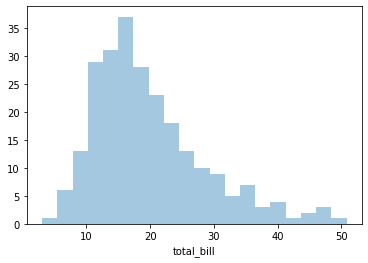

In [43]:
sns.distplot(tips['total_bill'], kde=False, bins=20)

## 1.2 Joint Plot - Bivariate Dist

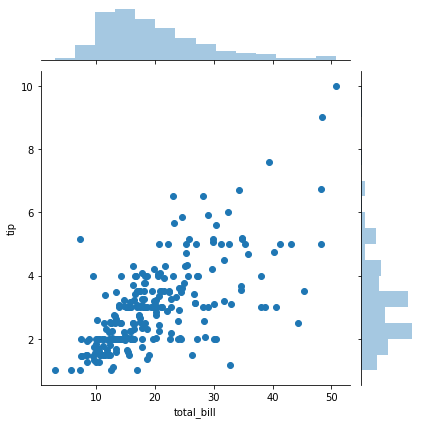

In [44]:
sns.jointplot(x='total_bill',y='tip',data=tips)

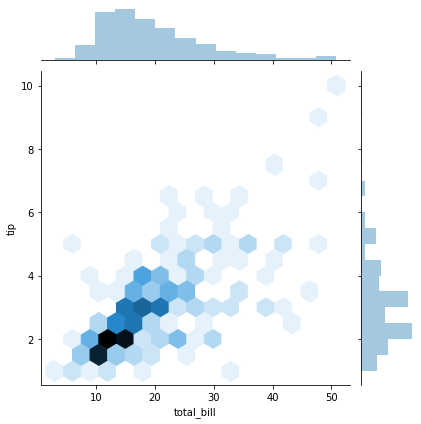

In [45]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex') #kind defaults to scatter

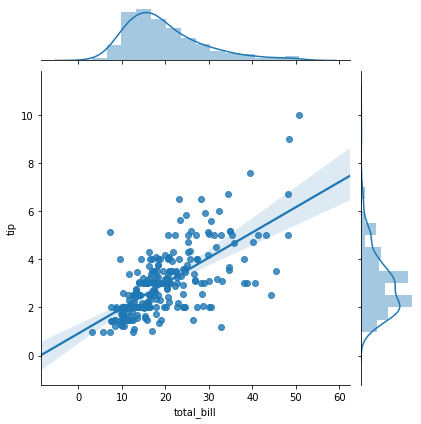

In [46]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg') 

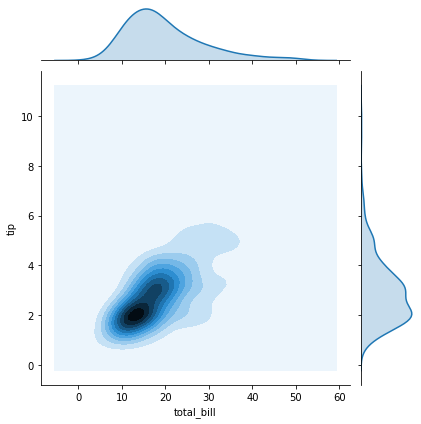

In [47]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde') 

## 1.3 Pair Plot

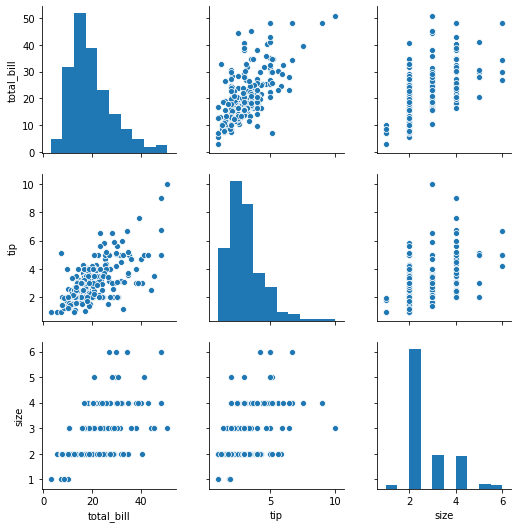

In [48]:
sns.pairplot(tips)

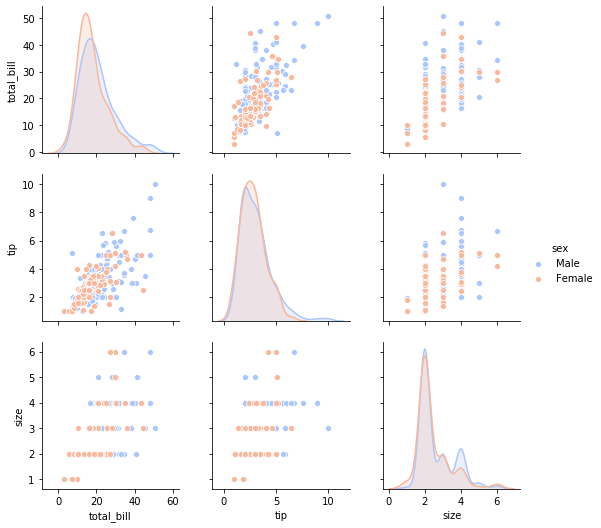

In [49]:
sns.pairplot(tips, hue='sex', palette='coolwarm') #Hue must be categorical

## 1.4 Rug Plot

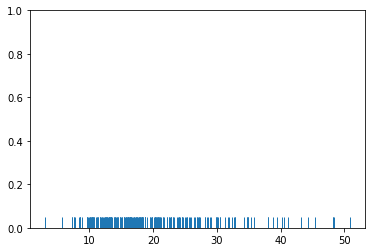

In [50]:
sns.rugplot(tips['total_bill'])

## 1.5 Kernel Density Estimation (KDE)

(0, 1)

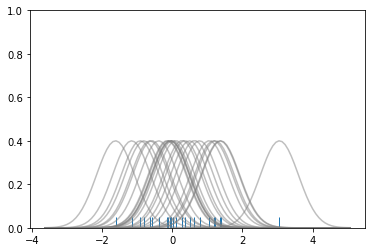

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

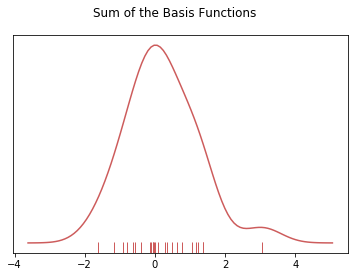

In [52]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

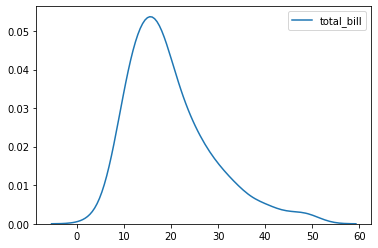

In [53]:
sns.kdeplot(tips['total_bill'])

# 2. Categorical Plots
<br/>

## 2.1 Bar Plot

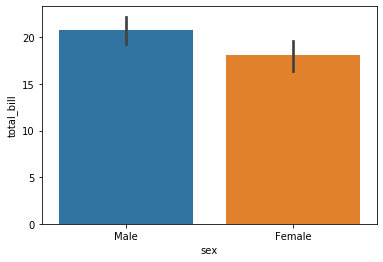

In [54]:
sns.barplot(x='sex',y='total_bill',data=tips)

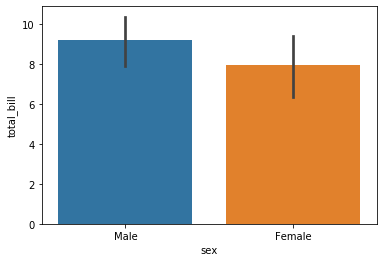

In [55]:
import numpy as np

sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std) #estimator object defaults to mean - aggregate

## 2.2 Count Plot

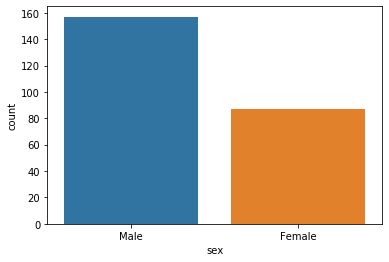

In [56]:
sns.countplot(x='sex',data=tips) #Estimator is counting the number of occurances

## 2.3 Box Plot

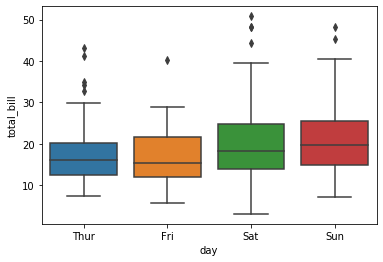

In [57]:
sns.boxplot(x='day', y='total_bill', data=tips)

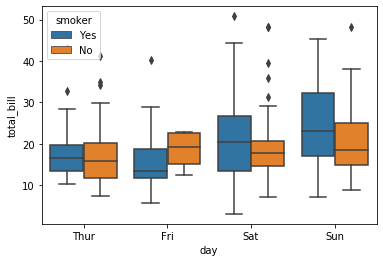

In [58]:
sns.boxplot(x='day', y='total_bill', data=tips,hue='smoker')

## 2.4 Violin Plot

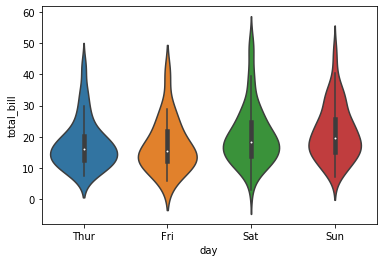

In [59]:
sns.violinplot(x='day',y='total_bill',data=tips)

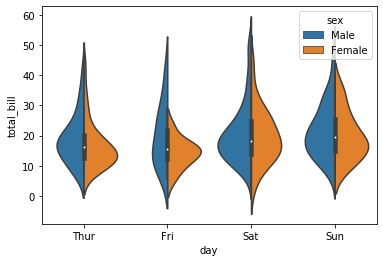

In [60]:
sns.violinplot(x='day',y='total_bill',data=tips, hue='sex',split=True) #This is sooo cool!

## 2.5 Strip Plot

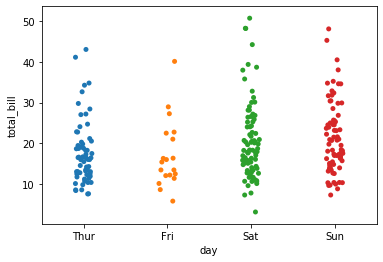

In [61]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True) #jitter add a bit of random noise to increase plot readability

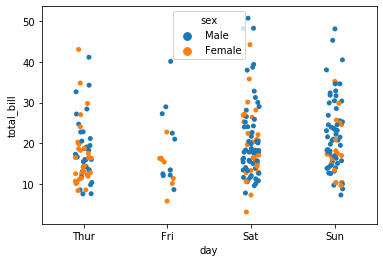

In [62]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True, hue='sex') #also accepts hue and split arguments

## 2.6 Swarmp Plot (Strip + Violin)

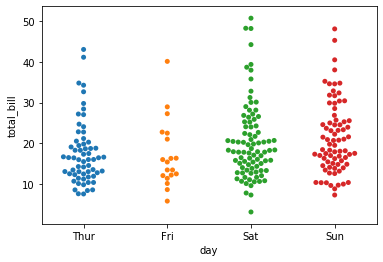

In [63]:
sns.swarmplot(x='day',y='total_bill',data=tips) #doesnt always scale well with large datasets

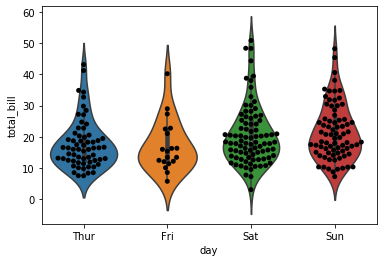

In [64]:
#Swarm + violin
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips, color='black') #more useful for exploration...not presentation

# Factor Plot

C:\Users\octav\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


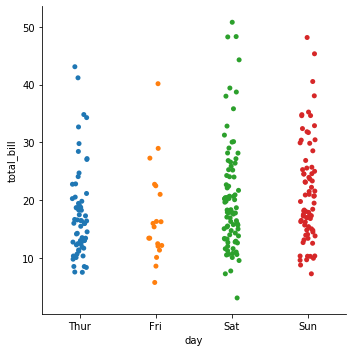

In [65]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='strip') #alternative call method